# Jupyter notebook (Caracterización de redes y topologías biológicas)
Autores: **Diego Mañanes Cayero** y **Alejandro Martín Muñoz**

## Práctica 1: Análisis de redes con NetworkX

En esta práctica vamos a calcular algunos parámetros de un grafo de pequeño tamaño, a continuación, vamos a cargar una red de interacción de proteínas, vamos a calcular sus principales parámetros mediante NetworkX y vamos a compararlos con los de un grafo aleatorio que tenga un número similar de nodos y ramas.

### Apartado 1

Este ejercicio debe realizarse con lápiz y papel (o con lápiz y Word) ya que debéis indicar los cálculos que habéis realizado.

**1. Representad el siguiente grafo dirigido mediante (a) una matriz de adyacencia y (b) una lista de adyacencia.**

(a) Matriz de adyacencia
<pre>
0	1	0	0	1	0	0	0	0	1
0	0	0	0	0	0	0	0	0	0
0	0	0	1	0	0	0	0	0	0
0	1	0	0	1	0	0	0	0	0
1	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	1	1
0	0	0	0	0	1	0	1	1	0
0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	1	0	0
1	0	0	0	0	1	0	0	0	0
</pre> 

(b) Lista de adyacencia

<pre>
1 → 2, 5, 10
2
3 → 4 
4 → 2, 5
5 → 1
6 → 9, 10
7 → 6, 8, 9
8
9 → 6, 8
10 → 1, 6
</pre>
<br>

**2.1 Responded a las siguientes preguntas:**

**a. ¿Es ponderado?**

No, ya que las ramas no tienen pesos asignados.

**b. ¿Es conexo?**

No, ya que, debido a que se trata de un grafo dirigido, hay nodos desde los que no se puede ir a otros. Por ejemplo, desde $V_2$ no se puede ir a otros nodos. 

**c. ¿Es débilmente conexo?**

Sí, ya que, obviando la cardinalidad, se puede ir desde cualquier nodo a otro.

**d. ¿Cuál es su tamaño y su orden?**

El tamaño (número de ramas) es de 16 y el orden (número de nodos) es de 10. 

**e. ¿Tiene algún punto de articulación? En caso positivo, indica cual.**

Considerando que se trata de un grafo no dirigido, hay 3 puntos de articulación: $V_4$, $V_1$, $V_{10}$ y $V_6$ (si se quita alguno de ellos, el grafo se vuelve inconexo).

**f. ¿Tiene lazos?**

Un lazo o bucle es que una rama sale y vuelve al mismo nodo. En este grafo, no hay ninguno.


**g. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.**

Un ciclo es un circuito en el que no repetimos vértices. A su vez, un circuito es un paseo cerrado en el que no se repiten ramas. Es decir, debemos buscar un pasero que salga de un punto y vuelva a él sin repetir ramas ni vértices. En este grafo, se pueden observar 4 ciclos: 

* $V_5-V_1$
* $V_5-V_{10}$
* $V_{10}-V_6$
* $V_6-V_9$

**h. ¿Existe algún camino entre los nodos 4 y 7? En caso positivo, indica cual es y su longitud.**

Teniendo en cuenta que se trata de un grafo dirigido, no existe un camino entre los nodos 4 y 7. 

**i. ¿Existe algún camino entre los nodos 3 y 9? En caso positivo, indica cual es y su longitud.**

Desde el nodo 3 al 9 sí existe un camino, cuya longitud es 6.

**2.2 Considera ahora el grafo como un grafo no dirigido.**

**a. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.**

El grafo no dirigido presenta 3 ciclos.

**b. ¿Cuál es el mayor valor de k para el cual existe un k-core?.**

Un k-core es un subgrafo en el que todos los nodos tienen el mismo número de vecinos. Por tanto, el mayor valor de  𝑘  con el que se puede construir un k-core es 3 considerando los nodos 6, 7, y 9, por ejemplo.

**c. Calcula el índice de clusterización del nodo 10.**

El índice de clusterización se calcula mediante la Ecuación 1, donde $N_v$ es el número de ramas que hay entre los vecinos de $v$ y $k_v$ es el grado de $v$. Por tanto, al no haber ramas que unan a los vecinos del nodo 10, su índice de clusterización es 0.

$$C_v = \frac{N_v}{\left(\frac{k_v(k_v-1)}{2}\right)}\tag{1}$$

**d. Calcula el camino carácterístico del nodo 10.**

El camino característico del nodo 10 es 20/9.

**e. Existe algún cliqué de orden mayor de 2. En caso positivo, indica los nodos que lo componen.**

No, no existe ningún cliqué de grado mayor de 2.

## Apartado 2

Análisis de una red de interacción de proteínas mediante NetworkX.

**1. Descargad de Moodle el grafo CaernoElegans-LC_uw.txt, el grafo contiene una red de interacción de proteínas correspondiente al gusano _Caernobidis elegans_.**

**2. El fichero que contiene la red está en formato lista de ramas, por tanto, cargad el grafo en una variable G_CE mediante la función read_edgelist("CL-LC_uw.txt").**

**3. Obtened e imprimid por la salida el orden y el tamaño del grafo y averiguad si el grafo es dirigido o no. ¿Es un grafo denso o disperso?**

In [1]:
# En primer lugar, se importan las librerías necesarias.

import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import numpy as np

%matplotlib inline

In [2]:
# A continuación, se cargan los datos del fichero CaernoElegans-LC_uw.txt

G_CE = nx.read_edgelist("CaernoElegans-LC_uw.txt")

n = nx.number_of_nodes(G_CE)
m = nx.number_of_edges(G_CE)
info = nx.info(G_CE)
dens = nx.density(G_CE)

display(Markdown("""
<br>
Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: {0}
* Tamaño del grafo: {1}

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el grado medio del grafo:

<br>
<pre>{2}
</pre>

Respecto a si se trata de un grafo denso o disperso, podemos saberlo a través de la función ``nx.density()``, que 
devuelve el coeficiente de densidad a partir del cual podemos inferir si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte:

* Un grafo es denso si número de ramas > número de vértices · log(número de vértices)/2.
* Un grafo es disperso si número de ramas < número de vértices · log(número de vértices)/2.

En este caso, podemos observar como el coeficiente de densidad es igual a {3}, por lo que se trata de un grafo
disperso.
<br>
<br>
                 """.format(n, m, info, dens)))



<br>
Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: 1387
* Tamaño del grafo: 1648

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el grado medio del grafo:

<br>
<pre>Name: 
Type: Graph
Number of nodes: 1387
Number of edges: 1648
Average degree:   2.3764
</pre>

Respecto a si se trata de un grafo denso o disperso, podemos saberlo a través de la función ``nx.density()``, que 
devuelve el coeficiente de densidad a partir del cual podemos inferir si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte:

* Un grafo es denso si número de ramas > número de vértices · log(número de vértices)/2.
* Un grafo es disperso si número de ramas < número de vértices · log(número de vértices)/2.

En este caso, podemos observar como el coeficiente de densidad es igual a 0.001714539566017576, por lo que se trata de un grafo
disperso.
<br>
<br>
                 


**4. Cread un grafo aleatorio G_AL que tenga el mismo orden y tamaño que el grafo que acabáis de cargar mediante la función gnm_random_graph(n,m)**

**5. Indica si ambos grafos son conexos.**



In [3]:
G_AL = nx.gnm_random_graph(n, m)

print("¿Es el grafo G_CE conexo?", nx.is_connected(G_CE))
print("¿Es el grafo G_AL conexo?", nx.is_connected(G_AL))

## búsqueda en anchura?
print("El número de componentes conexas de G_CE es:", nx.number_connected_components(G_CE))
print("El número de componentes conexas de G_AL es:", nx.number_connected_components(G_AL))

¿Es el grafo G_CE conexo? False
¿Es el grafo G_AL conexo? False
El número de componentes conexas de G_CE es: 89
El número de componentes conexas de G_AL es: 168


**6. ¿Cuál es el nodo con mayor grado en cada grafo?**

In [12]:
# Primera aproximación

x = dict(nx.degree(G_CE))
m = max(x.values())

for pos, degree in enumerate(x.values()):
    if degree == m:
        print("(", list(x.keys())[pos], ",", degree, ")")

# Segunda aproximación (más eficiente)

max(x.items(), key = lambda k: k[1])

( T08G11.5 , 131 )


('T08G11.5', 131)

**7. ¿Cuál es la máxima distancia entre dos nodos del grafo (diámetro del grafo)?**

In [5]:
try:
    nx.diameter(G_CE)
except nx.NetworkXError:
    print("Debido a que el grafo no es conexo, la máxima distancia entre dos nodos del grafo es infinita.")

Debido a que el grafo no es conexo, la máxima distancia entre dos nodos del grafo es infinita.


## Apartado 3

Distribución del grado de los nodos.

**1. Visualizad la distribución del grado de los nodos de ambos grafos.**

**2. ¿Son iguales las gráficas de distribución de grados de ambos grafos?, ¿Qué conclusión sacas de lo anterior?**

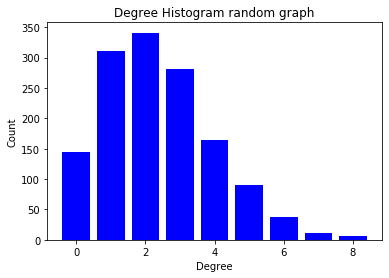

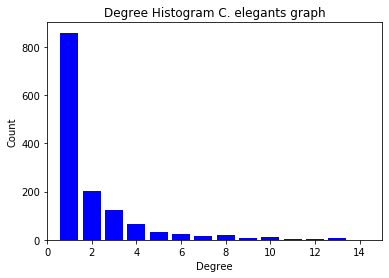

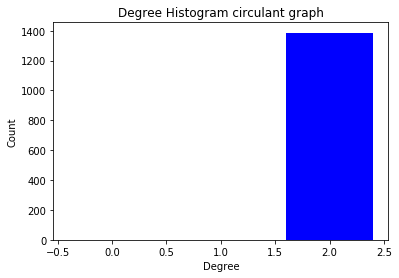

In [16]:
# Grafo aleatorio
L = nx.degree_histogram(G_AL)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.title("Degree Histogram random graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# Grafo de estudio
L = nx.degree_histogram(G_CE)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.title("Degree Histogram C. elegants graph")
plt.xlim(0, 15)
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

## Grafo regular cíclico
G_RE = nx.generators.classic.circulant_graph(n, [1])

L = nx.degree_histogram(G_RE)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.title("Degree Histogram circulant graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

A partir de la distribución de grados de cada grafo se puede inferir que nuestra red no se trata de un grafo aleatorio, ya que no sigue una distribución binomial (de Poisson tendiendo a infinito); ni es un grafo regular, ya que no hay ningún grado con probabilidad igual a 1 y el resto igual a 0 (un grafo es regular si todos los nodos tienen el mismo grado, como se puede observar en la última gráfica).

**3. Dibujad ahora la distribución del grado de los nodos de la red de interacción de proteínas usando escala logarítmica en ambos ejes, añade para ello estas dos líneas de código para cambiar el tipo de escala en cada eje**

``plt.xscale("log", nonposx='clip')``

``plt.yscale("log", nonposy='clip')``

**4. ¿Qué tipo de gráfica obtienes? ¿Podrías calcular aproximadamente la pendiente de los datos?**

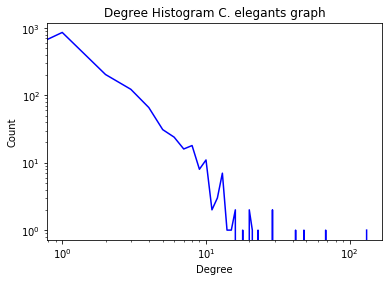

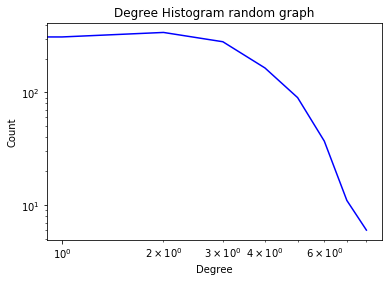

In [55]:
L = nx.degree_histogram(G_CE)
plt.plot(range(len(L)), L, color='b')
plt.title("Degree Histogram C. elegants graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')
plt.show()

L = nx.degree_histogram(G_AL)
plt.plot(range(len(L)),L,  color='b')
plt.title("Degree Histogram random graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')
plt.show()

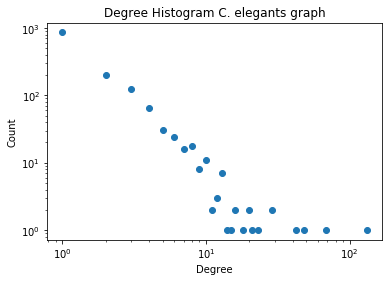

In [8]:
L = nx.degree_histogram(G_CE)

plt.plot(range(len(L)),L, 'o')
plt.title("Degree Histogram C. elegants graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')
plt.show()

## Apartado 4

Cálculo de parámetros de los grafos. Calculad, al menos, los siguientes parámetros para ambos grafos:

**a. degree_centrality(G) (una vez obtenido el valor para los nodos, debéis hacer el promedio entre todos los nodos, para ello si d es el diccionario obtenido que contiene los valores, usad sum(d.values()) y dividid por el orden del grafo).**

**b. closeness_centrality(G) (una vez obtenido el valor para los nodos, debéis hacer el promedio entre todos los nodos).**

**c. betweenness_centrality(G) (una vez obtenido el valor para los nodos, debéis hacer el promedio entre todos los nodos).**

**d. average_clustering(G).**

**e. El máximo k para el cual existe un k core (recomendación, usad core_number(G)).**